# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [3]:
# 讀取資料檔
f_app_train = os.path.join('', 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [19]:
# 觀察相關係數
corr_target = app_train.corr()['TARGET']
corr_target

SK_ID_CURR                     0.015474
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.045993
FLAG_OWN_CAR                        NaN
FLAG_OWN_REALTY                0.003398
CNT_CHILDREN                  -0.019993
AMT_INCOME_TOTAL              -0.039762
AMT_CREDIT                    -0.014634
AMT_ANNUITY                   -0.000765
AMT_GOODS_PRICE               -0.021950
REGION_POPULATION_RELATIVE    -0.021225
DAYS_BIRTH                    -0.041108
DAYS_EMPLOYED                  0.062950
DAYS_REGISTRATION              0.013710
DAYS_ID_PUBLISH                0.024877
OWN_CAR_AGE                    0.028052
FLAG_MOBIL                          NaN
FLAG_EMP_PHONE                 0.003892
FLAG_WORK_PHONE                0.014212
FLAG_CONT_MOBILE               0.005647
FLAG_PHONE                    -0.015447
FLAG_EMAIL                     0.007170
CNT_FAM_MEMBERS               -0.023435
REGION_RATING_CLIENT           0.053614
REGION_RATING_CLIENT_W_CITY    0.061214


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [21]:
###
#nlargest(15, )
# removing null values 
# extracting greatest 5 
# display 
###
corr_target.dropna(inplace = True) 
large15 = corr_target.nlargest(15, ) 
large15 

TARGET                         1.000000
DAYS_EMPLOYED                  0.062950
REGION_RATING_CLIENT_W_CITY    0.061214
FLAG_DOCUMENT_3                0.054269
REGION_RATING_CLIENT           0.053614
AMT_REQ_CREDIT_BUREAU_YEAR     0.033832
OBS_30_CNT_SOCIAL_CIRCLE       0.031041
OBS_60_CNT_SOCIAL_CIRCLE       0.030730
OWN_CAR_AGE                    0.028052
DAYS_ID_PUBLISH                0.024877
DEF_30_CNT_SOCIAL_CIRCLE       0.022807
FLAG_DOCUMENT_7                0.021218
DEF_60_CNT_SOCIAL_CIRCLE       0.020796
DAYS_LAST_PHONE_CHANGE         0.019082
AMT_REQ_CREDIT_BUREAU_QRT      0.016465
Name: TARGET, dtype: float64

In [28]:
sub_df = app_train[app_train['OWN_CAR_AGE'] != 99]

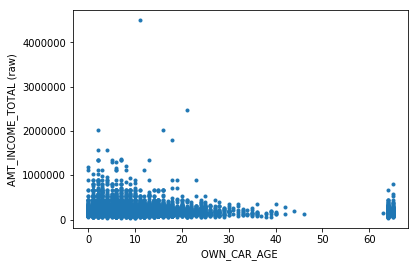

Correlation: -0.1201


In [30]:
plt.plot(sub_df['OWN_CAR_AGE'] , sub_df['AMT_INCOME_TOTAL'], '.')
plt.xlabel('OWN_CAR_AGE ')
plt.ylabel('AMT_INCOME_TOTAL (raw)')
plt.show()
corr = np.corrcoef(sub_df['OWN_CAR_AGE'] , sub_df['AMT_INCOME_TOTAL'])
print("Correlation: %.4f" % (corr[0][1]))

In [31]:
###
#nsmallest(15, )
# removing null values 
# extracting greatest 5 
# display 
###
corr_target.dropna(inplace = True) 
large15 = corr_target.nsmallest(15, ) 
large15 

EXT_SOURCE_3           -0.150720
EXT_SOURCE_2           -0.130969
EXT_SOURCE_1           -0.129548
FLOORSMAX_AVG          -0.046110
NAME_CONTRACT_TYPE     -0.045993
FLOORSMAX_MODE         -0.045990
FLOORSMAX_MEDI         -0.045206
DAYS_BIRTH             -0.041108
AMT_INCOME_TOTAL       -0.039762
FLOORSMIN_MEDI         -0.033313
FLOORSMIN_AVG          -0.032904
FLOORSMIN_MODE         -0.031688
TOTALAREA_MODE         -0.029714
LIVINGAPARTMENTS_AVG   -0.028103
APARTMENTS_AVG         -0.028069
Name: TARGET, dtype: float64

In [32]:
sub_df = app_train[app_train['EXT_SOURCE_3'] != 99]

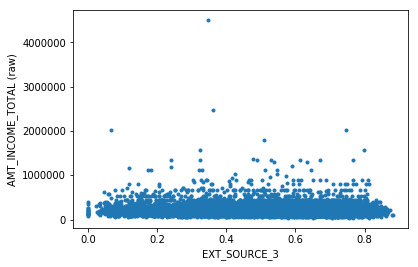

Correlation: -0.1201


In [35]:
plt.plot(sub_df['EXT_SOURCE_3'] , sub_df['AMT_INCOME_TOTAL'], '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('AMT_INCOME_TOTAL (raw)')
plt.show()
corr = np.corrcoef(sub_df['OWN_CAR_AGE'] , sub_df['AMT_INCOME_TOTAL'])
print("Correlation: %.4f" % (corr[0][1]))

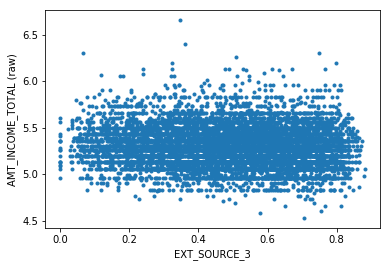

Correlation: -0.1454


In [38]:
plt.plot(sub_df['EXT_SOURCE_3'] , np.log10(sub_df['AMT_INCOME_TOTAL']), '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('AMT_INCOME_TOTAL (raw)')
plt.show()
corr = np.corrcoef(sub_df['OWN_CAR_AGE'] , np.log10(sub_df['AMT_INCOME_TOTAL']))
print("Correlation: %.4f" % (corr[0][1]))